In [1]:
%pip install wbdata
import wbdata
import pandas as pd
import numpy as np
%pip install cufflinks
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:


variable_labels = {"SP.POP.TOTL":"KOR Population", 
                   "SP.POP.3539.FE": "Population ages 35-39, female", 
                   "SP.POP.3034.FE": "Population ages 30-34, female", 
                   "SP.POP.2529.FE": "Population ages 25-29, female",
                   "SP.DYN.TFRT.IN": "Fertility rate", 
                   "SP.POP.3539.MA": "Population ages 35-39, male", 
                   "SP.POP.3034.MA": "Population ages 30-34, male", 
                   "SP.POP.2529.MA": "Population ages 25-29, male", 
                   "SP.POP.2024.MA": "Population ages 20-24, male", 
                   "SP.POP.GROW": "Population growth (annual %)", 
                   "SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)",
                   "SP.DYN.CBRT.IN": "Birth rate, crude (per 1,000 people)"}       
KOR = wbdata.get_dataframe(variable_labels, country="KOR")
KOR.index = KOR.index.astype(int)
KOR.head()

,KOR Population,"Population ages 35-39, female","Population ages 30-34, female","Population ages 25-29, female",Fertility rate,"Population ages 35-39, male","Population ages 30-34, male","Population ages 25-29, male","Population ages 20-24, male",Population growth (annual %),"Mortality rate, under-5 (per 1,000 live births)","Birth rate, crude (per 1,000 people)"
date,,,,,,,,,,,,
2022,51628117.0,1680847.0,1593063.0,1687834.0,NaN,1825117.0,1799943.0,1923217.0,1600801.0,-0.225899,NaN,NaN
2021,51744876.0,1771725.0,1565752.0,1696779.0,0.808,1912436.0,1757692.0,1945180.0,1691856.0,-0.176409,2.9,5.1
2020,51836239.0,1865559.0,1557387.0,1687370.0,0.837,2000804.0,1737312.0,1937096.0,1762109.0,0.137869,3.0,5.3
2019,51764822.0,1943450.0,1567142.0,1657889.0,0.918,2072731.0,1734852.0,1899505.0,1811366.0,0.347875,3.1,5.9
2018,51585058.0,1972614.0,1603984.0,1617263.0,0.977,2099427.0,1763438.0,1842596.0,1848784.0,0.433519,3.2,6.4


In [3]:
birth_mortality = KOR[['Birth rate, crude (per 1,000 people)', 'Mortality rate, under-5 (per 1,000 live births)']].sort_index()
birth_mortality

,"Birth rate, crude (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)"
date,,
1960,41.930,111.9
1961,40.983,106.5
1962,39.657,101.8
1963,38.083,96.9
1964,36.448,92.0
...,...,...
2018,6.400,3.2
2019,5.900,3.1
2020,5.300,3.0


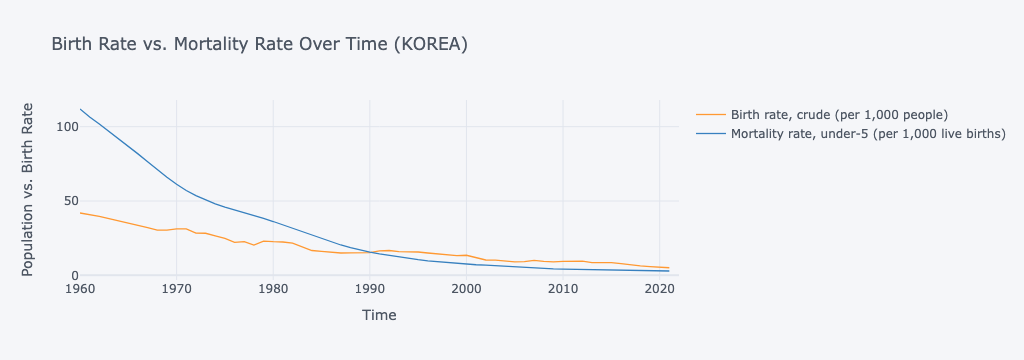

In [4]:
birth_mortality.iplot(title="Birth Rate vs. Mortality Rate Over Time (KOREA)",xTitle='Time',yTitle='Population vs. Birth Rate')

In [5]:
SOURCE = 40 # "World Development Indicators
indicators = wbdata.get_indicators(source=SOURCE)
indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [6]:
variablelabels = {"NY.GDP.PCAP.CD":"GDP per capita (current US$)", "NY.GDP.PCAP.KD.ZG": "GDP per capita growth (annual %)"}

KORECON = wbdata.get_dataframe(variablelabels, country="KOR")

# Date index is of type string; change to integers
KORECON.index = KORECON.index.astype(int)

# Print a few years' data
KORECON=KORECON.sort_index()
KORECON.index=KORECON.index.astype(int)
KORECON

,GDP per capita (current US$),GDP per capita growth (annual %)
date,,
1960,158.274136,NaN
1961,93.831383,3.809555
1962,106.159703,0.966642
1963,146.302493,6.026426
1964,123.606374,6.647770
...,...,...
2018,33447.156284,2.462246
2019,31902.416905,1.888915
2020,31721.298914,-0.846212


In [7]:
df=birth_mortality.join(KORECON)
df

,"Birth rate, crude (per 1,000 people)","Mortality rate, under-5 (per 1,000 live births)",GDP per capita (current US$),GDP per capita growth (annual %)
date,,,,
1960,41.930,111.9,158.274136,NaN
1961,40.983,106.5,93.831383,3.809555
1962,39.657,101.8,106.159703,0.966642
1963,38.083,96.9,146.302493,6.026426
1964,36.448,92.0,123.606374,6.647770
...,...,...,...,...
2018,6.400,3.2,33447.156284,2.462246
2019,5.900,3.1,31902.416905,1.888915
2020,5.300,3.0,31721.298914,-0.846212


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

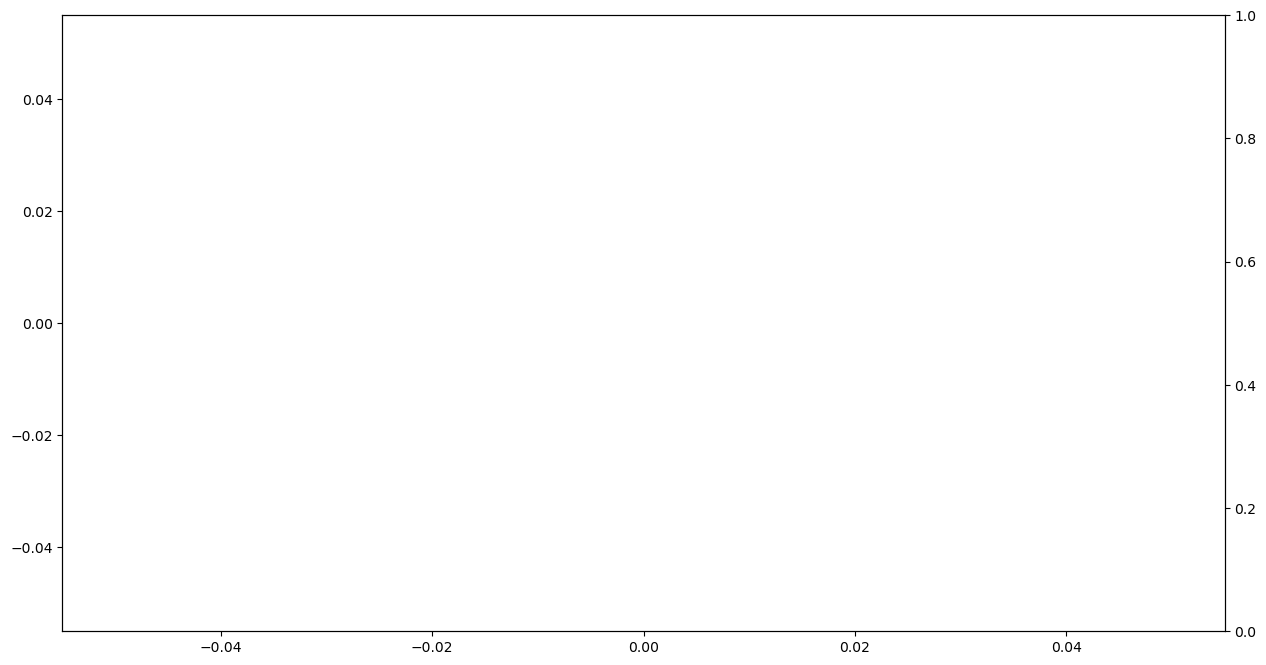

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df=birth_mortality.join(KORECON)
plt.figure(figsize=(15, 8))

ax1 = plt.gca()  # Get the current axes
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot the birth rate on the left y-axis (ax1)
sns.lineplot(data=df, x='date', y='Birth rate, crude (per 1,000 people)', 
             label='Birth rate', color='blue', linewidth=2.5, ax=ax1)

# Plot the GDP per capita growth on the right y-axis (ax2)
sns.lineplot(data=df, x='date', y='GDP per capita (current US$)',
             label='GDP per capita (current US$)', color='red', linewidth=2.5, ax=ax2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Birth rate, crude (per 1,000 people)', color='blue')
ax2.set_ylabel('GDP per capita (current US$)', color='red')
plt.title("Birth Rate vs GDP Per Capita Over Year")
plt.show()

In [31]:
df1=KOR[["Fertility rate"]].join(KORECON)
df1

,Fertility rate,GDP per capita (current US$),GDP per capita growth (annual %)
date,,,
2022,NaN,32422.574486,2.844735
2021,0.808,35142.264267,4.488900
2020,0.837,31721.298914,-0.846212
2019,0.918,31902.416905,1.888915
2018,0.977,33447.156284,2.462246
...,...,...,...
1964,5.188,123.606374,6.647770
1963,5.407,146.302493,6.026426
1962,5.624,106.159703,0.966642


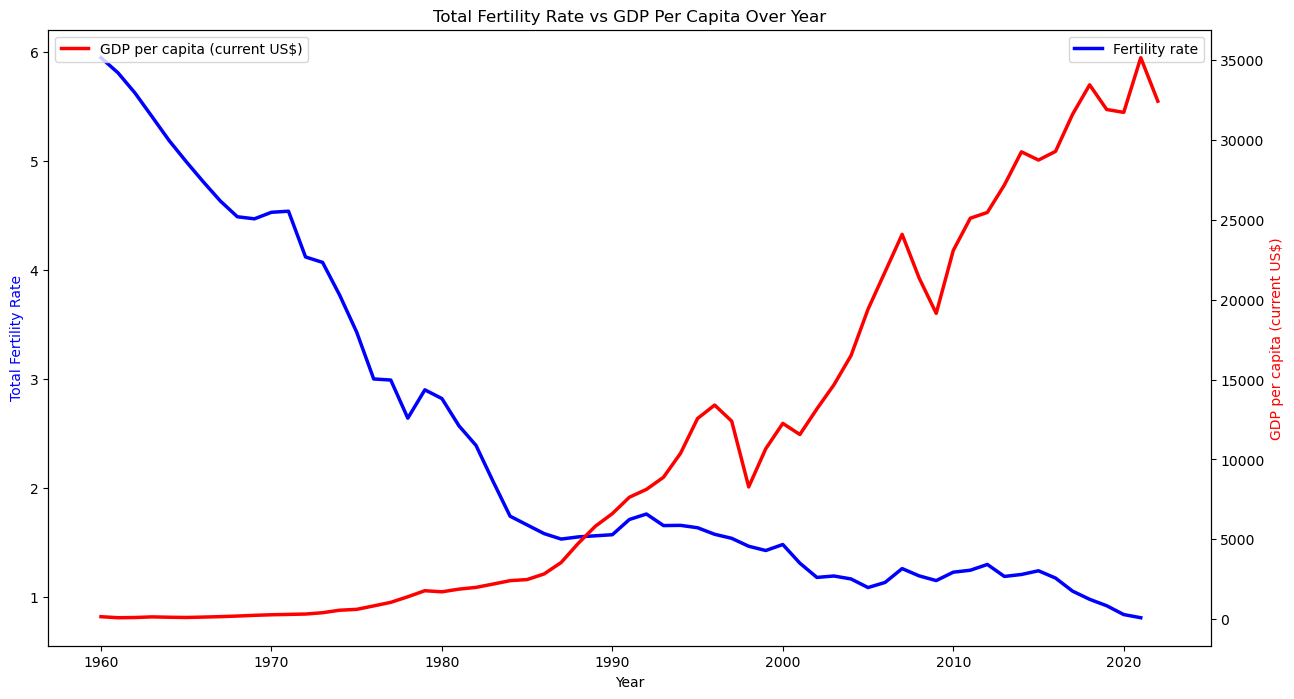

In [35]:
df=birth_mortality.join(KORECON)
plt.figure(figsize=(15, 8))

ax1 = plt.gca()  # Get the current axes
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot the birth rate on the left y-axis (ax1)
sns.lineplot(data=df1, x='date', y='Fertility rate', 
             label='Fertility rate', color='blue', linewidth=2.5, ax=ax1)

# Plot the GDP per capita growth on the right y-axis (ax2)
sns.lineplot(data=df1, x='date', y='GDP per capita (current US$)',
             label='GDP per capita (current US$)', color='red', linewidth=2.5, ax=ax2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fertility Rate', color='blue')
ax2.set_ylabel('GDP per capita (current US$)', color='red')
plt.title("Total Fertility Rate vs GDP Per Capita Over Year")

plt.show()